<a href="https://colab.research.google.com/github/madhumithadasarathy/My_Projects/blob/main/Purchase_of_a_Product_in_social_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

### Problem Statement

Nowadays, social media advertising is one of the popular forms of  advertising. Advertisers can utilise user's demographic information and target their ads accordingly.

Implement Random Forest Classification and Logistic Regression to determine whether a user will purchase a particular product displayed on a social network ad or not.  Compare the accuracy of both the classification algorithms.


---

### List of Activities

**Activity 1:** Analysing the Dataset

**Activity 2:** Train-Test Split

**Activity 3:** Random Forest Classification - Model Training

**Activity 4:** Random Forest Classification - Model Prediction and Evaluation

**Activity 5:** Logistic Regression - Model Training

**Activity 6:** Logistic Regression - Model Prediction and Evaluation

**Activity 7:** Comparision and Conclusion








---


#### Activity 1:  Analysing the Dataset

- To create Pandas DataFrame for **Social Network** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|UserID|Unique ID|
|Gender|Male or Female|
|Age|Age of a person|
|EstimatedSalary|Salary of a person|
|Purchased|‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased.|


  **Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/social-network-ads.csv

- To print the first five rows of the dataset. Check for null values and treat them accordingly (if any).

- To create a heatmap to identify the relationship between the independent attributes and dependent attribute `Purchased`.




In [ ]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the dataset
# Dataset Link: 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/social-network-ads.csv'
df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/social-network-ads.csv')
# Printing the first five rows of the dataframe
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Printing the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Q:** Are there any missing values?

**A:** No, there are no missing values in the dataframe.

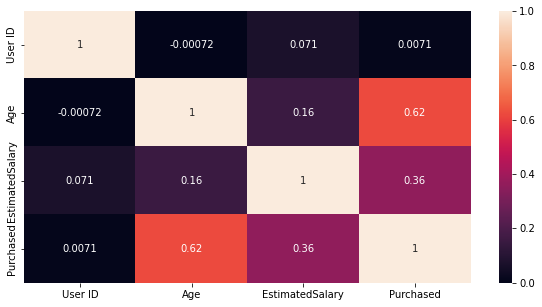

In [ ]:
# Creating a heatmap to identify the relation between attributes
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot= True)
plt.show()

**Q:** Which attribute(s) has the strongest relationship with the `Purchased` feature?

**A:** Age has the strongest relationship with the "Purchased" feature.

---


#### Activity 2: Train-Test Split

We have to determine the effect of `Age` on purchase of the products. Thus, `Age` is the feature variable and `Purchased` is the target variable.

- Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

- Reshape the feature and the target variable arrays into two-dimensional arrays by using `reshape(-1, 1)` function of `numpy` module.


In [ ]:
# Splitting the DataFrame into the train and test sets.
from sklearn.model_selection import train_test_split
X = df["Age"]
y = df["Purchased"]

# Splitting the DataFrame into the train and test sets such that test set has 30% of the values.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Reshaping to 2-dimensional array.
X_train_reshaped = X_train.values.reshape(-1,1)
y_train_reshaped = y_train.values.reshape(-1,1)
X_test_reshaped = X_test.values.reshape(-1,1)
y_test_reshaped = y_test.values.reshape(-1,1)

----

#### Activity 3: Random Forest Classification - Model Training

Implement Random Forest Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `RandomForestClassifier` class and create an object of this class.
2. Call the `fit()` function using the Random Forest Classifier object and print score using `score()` function using the object created.


In [ ]:
# Importing the required modules from the 'sklearn.ensemble' and 'sklearn.metrics' libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
# Training the Random Forest Classifier
rf = RandomForestClassifier(n_jobs = -1,n_estimators=50)
rf.fit(X_train_reshaped,y_train_reshaped)
rf.score(X_train_reshaped,y_train_reshaped)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.825

-----

#### Activity 4: Random Forest Classification - Model Prediction and Evaluation

Predict the values for both training and test sets by calling the `predict()` function on the Random Forest Classifier object.

Also, compute confusion matrix and classification report values to evaluate the accuracy of your model.

In [ ]:
# Makeing predictions on the test dataset by using the 'predict()' function.
y_pred = rf.predict(X_test_reshaped)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
# Checking the count of records classified under each label
df.value_counts()

User ID   Gender  Age  EstimatedSalary  Purchased
15815236  Female  45   131000           1            1
15660200  Female  37   71000            0            1
15649668  Male    41   79000            0            1
15651983  Male    34   112000           1            1
15652400  Female  38   50000            0            1
                                                    ..
15733883  Male    47   25000            1            1
15733964  Female  38   50000            0            1
15733973  Female  47   113000           1            1
15734161  Female  37   93000            1            1
15566689  Female  35   57000            0            1
Length: 400, dtype: int64

In [ ]:
# Displaying the results of 'confusion_matrix'
confusion_matrix(y_test_reshaped,y_pred)

array([[66,  7],
       [12, 35]])

In [ ]:
# Displaying the precision, recall and f1-score values.
print(classification_report(y_test_reshaped,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        73
           1       0.83      0.74      0.79        47

    accuracy                           0.84       120
   macro avg       0.84      0.82      0.83       120
weighted avg       0.84      0.84      0.84       120



**Q** Write the count of f1-score of both labels?

**A:** f1-score for 0: 0.87,
       f1-score for 1: 0.79

----

#### Activity 5: Logistic Regression - Model Training

Implement Logistic Regression Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `LogisticRegression` class and create an object of this class.
2. Call the `fit()` function on the Logistic Regression object and print score using `score()` function using the object created.


In [ ]:
# Deploying the 'LogisticRegression' model using the 'fit()' function.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(n_jobs=-1)
log_reg.fit(X_train_reshaped,y_train_reshaped)
log_reg.score(X_train_reshaped,y_train_reshaped)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8214285714285714

----

#### Activity 6: Logistic Regression - Model Prediction and Evaluation

Predict the values for both training and test sets by calling the `predict()` function on the Logistic Regression object.

Also, compute the confusion matrix and classification report values to evaluate the accuracy of your model.

In [ ]:
# Making predictions on the test dataset by using the 'predict()' function.
y_pred2 = log_reg.predict(X_test_reshaped)
y_pred2

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
# Displaying the results of confusion_matrix
confusion_matrix(y_test_reshaped,y_pred2)

array([[70,  3],
       [12, 35]])

In [ ]:
# Displaying the results of classification_report
print(classification_report(y_test_reshaped,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        73
           1       0.92      0.74      0.82        47

    accuracy                           0.88       120
   macro avg       0.89      0.85      0.86       120
weighted avg       0.88      0.88      0.87       120



**Q** Write the count of f1-score of both labels?

**A:** The count of f1-score of both the labels are 0.90 and 0.82

-----

#### Activity 7: Comparision and Conclusion

Test both the models to predict labels using same random values of `Age` attribute.

In [ ]:
# Using Logistic Regression
print("\nRandom Forest Classifier:",rf.predict(df["Age"].values.reshape(-1,1)),"\nLogistic Regression",log_reg.predict(df["Age"].values.reshape(-1,1)))


Random Forest Classifier: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1] 
Logistic Regression [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 

**Q** Which model is better and why?

**A:** The logistic regression model is better because it has higher f-1 score for both the labels which suggest that it has higher count of values for true positives and true negatives.

------